In [8]:
import numpy as np

from matplotlib import pyplot as plt

In [64]:
class AG:
    def __init__(self, population_size, mutation_rate, mutation_range, dtype=np.float32):
        self.population_size = population_size
        self.mutation_rate = mutation_rate
        self.mutation_range = mutation_range
        self.dtype = dtype

    def mutation(self, individual):
        if np.random.rand() < self.mutation_rate:
            individual += np.random.rand(self.chromosome_size)*self.mutation_range
        
        return individual

        
    def cross_over(self, individual1, individual2): #mean
        return (individual1+individual2)/2.0

    def selection(self): #tournament
        index1 = np.random.randint(self.population_size)
        index2 = np.random.randint(self.population_size)

        if self.fitness_scores[index1] > self.fitness_scores[index2]:
            return self.population[index1]
        return self.population[index2]

    def new_population(self):
        new_population = np.zeros_like(self.population)
        
        best_fitness = np.argmax(self.fitness_scores)
        best_individual = self.population[best_fitness]

        self.individual_best_hist[self.current_generation] = best_individual
        self.fitness_best_hist[self.current_generation] = self.fitness_scores[best_fitness]
        self.fitness_mean_hist[self.current_generation] = np.mean(self.fitness_scores)
        self.fitness_std_hist[self.current_generation] = np.std(self.fitness_scores)


        new_population[0] = best_individual

        for i in range(1, self.population_size):
            father1 = self.selection()
            father2 = self.selection()

            new_individual = self.cross_over(father1, father2)
            new_individual = self.mutation(new_individual)

            new_population[i] = new_individual
        
        return new_population
        
    
    def optimize(self, fitness_function, chromosome_size, max_cromossome_value, min_cromossome_value, n_generation):
        self.chromosome_size = chromosome_size

        self.population = np.random.rand(self.population_size, self.chromosome_size).astype(self.dtype)
        self.population *= max_cromossome_value-min_cromossome_value
        self.population += min_cromossome_value

        self.fitness_scores = np.zeros(self.population_size)

        self.individual_best_hist = np.zeros((n_generation, chromosome_size))
        self.fitness_best_hist = np.zeros(n_generation)
        self.fitness_mean_hist = np.zeros(n_generation)
        self.fitness_std_hist = np.zeros(n_generation)

        self.current_generation = 0

        for i in range(n_generation):
            for j in range(self.population_size):
                self.fitness_scores[j] = fitness_function(self.population[j])

            self.population = self.new_population()

            self.current_generation += 1



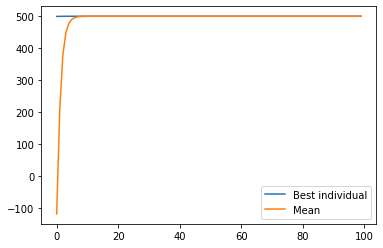

In [68]:
def fitness_function(individual):

    if individual > 500:
        return 1000-individual
    return individual

ag = AG(1000, 0.1, 1)

ag.optimize(fitness_function, 1, 1000, -1000, 100)

plt.plot(np.arange(100), ag.fitness_best_hist)
plt.plot(np.arange(100), ag.fitness_mean_hist)
plt.legend(["Best individual", "Mean"])

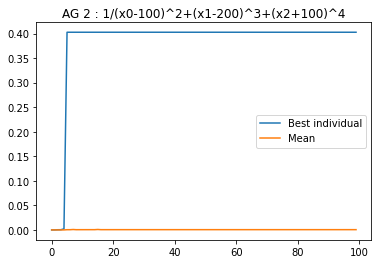

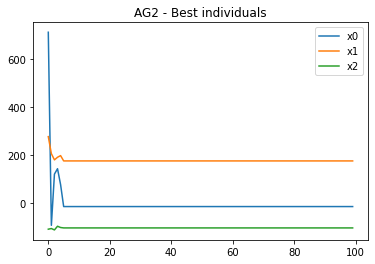

array([ -12.81776428,  176.65065002, -101.45790863])

In [89]:
def fitness_function2(individual):
    score = np.power(individual[0]-100, 2)
    score += np.power(individual[1]-200, 3)
    score += np.power(individual[2]+100, 4) 

    return 1/score

population_size = 100
ag.optimize(fitness_function2, 3, 1000, -1000, population_size)

plt.plot(np.arange(population_size), ag.fitness_best_hist)
plt.plot(np.arange(population_size), ag.fitness_mean_hist)
plt.legend(["Best individual", "Mean"])
plt.title("AG 2 : 1/(x0-100)^2+(x1-200)^3+(x2+100)^4")
plt.show()

plt.title("AG2 - Best individuals")
plt.plot(np.arange(population_size), ag.individual_best_hist[: , 0])
plt.plot(np.arange(population_size), ag.individual_best_hist[: , 1])
plt.plot(np.arange(population_size), ag.individual_best_hist[: , 2])
plt.legend(["x0", "x1", "x2"])
plt.show()

ag.individual_best_hist[-1]